In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import pickle


C:\Users\abhis\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
# (x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [5]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

train = unpickle("cifar-10-batches-py\data_batch_1")
test = unpickle("cifar-10-batches-py\data_batch_2")
X_train = np.array(train[b'data'])
y_train = np.array(train[b'labels'])
X_test = np.array(test[b'data'])
y_test = np.array(test[b'labels'])
X_train = X_train.reshape(-1, 32, 32, 3)
X_test = X_test.reshape(-1, 32, 32, 3)

In [6]:
y_train.shape

(10000,)

50000 training images and 10000 test images

In [7]:
X_test.shape

(10000, 32, 32, 3)

y_train is a 2D array convert this to now 1D array

In [8]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1])

In [9]:
y_test = y_test.reshape(-1,)

In [10]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [11]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

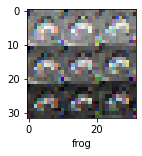

In [12]:
plot_sample(X_train, y_train, 0)

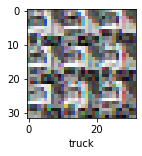

In [13]:
plot_sample(X_train, y_train, 1)

Normalizing traning data from 0 to 1. RGB channels range from 0 to 255

In [14]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [15]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [16]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Fit Model and Iterations

In [17]:
fitted = cnn.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
313/313 [==============================] - 14s 35ms/step - loss: 1.9014 - accuracy: 0.3058 - val_loss: 1.6950 - val_accuracy: 0.4018
Epoch 2/10
313/313 [==============================] - 11s 35ms/step - loss: 1.5703 - accuracy: 0.4406 - val_loss: 1.5403 - val_accuracy: 0.4475
Epoch 3/10
313/313 [==============================] - 10s 33ms/step - loss: 1.4295 - accuracy: 0.4963 - val_loss: 1.5085 - val_accuracy: 0.4625
Epoch 4/10
313/313 [==============================] - 10s 34ms/step - loss: 1.3421 - accuracy: 0.5237 - val_loss: 1.5044 - val_accuracy: 0.4720
Epoch 5/10
313/313 [==============================] - 10s 32ms/step - loss: 1.2621 - accuracy: 0.5507 - val_loss: 1.3642 - val_accuracy: 0.5206
Epoch 6/10
313/313 [==============================] - 10s 31ms/step - loss: 1.1925 - accuracy: 0.5788 - val_loss: 1.3667 - val_accuracy: 0.5202
Epoch 7/10
313/313 [==============================] - 12s 37ms/step - loss: 1.1153 - accuracy: 0.6045 - val_loss: 1.3628 - val_accuracy:

Evaluate the Model

In [18]:
test_loss, test_accuracy = cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 1.4048 - accuracy: 0.5394


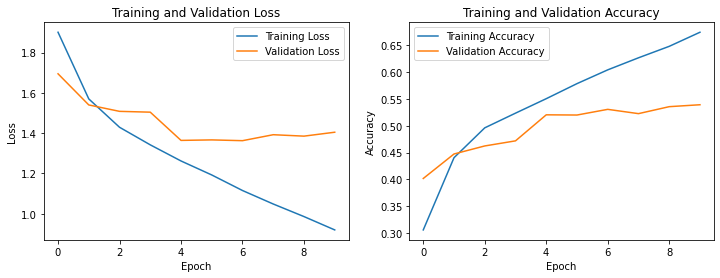

In [19]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(fitted.history['loss'], label='Training Loss')
plt.plot(fitted.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(fitted.history['accuracy'], label='Training Accuracy')
plt.plot(fitted.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.show()